In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

# **Integral image class**

In [18]:
# a class for integral image
class Integral_Image():
  def __init__(self, img_path=None, img_arr=None):
    self.img_path = img_path
    self.img_arr = img_arr
    self.integral = None
    self.squared_integral = None


  # a function to load img from path and return the image shape
  def load_img(self, path=None):
    # checking for invalid input
    if self.img_path==None and path==None:
      raise ValueError('Please provide path to image.')
    else:
      self.img_path = path if path != None else self.img_path

    # checking if the path exists
    if not os.path.exists(self.img_path):
      raise ValueError(f'{self.img_path} does not exist')
    else:
      self.img_arr = cv.imread(self.img_path, cv.IMREAD_GRAYSCALE)
    
    return self.img_arr.shape


  def show_img(self):
    if type(self.img_arr) != np.ndarray:
      raise ValueError(f'Image has not been loaded. Please use load_img(img_path) first.')
    else:
      print(f'Image shape: {self.img_arr.shape}')
      plt.imshow(self.img_arr)


  # calculate the integral image
  def cal_integral(self, input_arr=None, squared=False):
    # checking if the image has been loaded if there is no input
    self.checking_for_img()
    arr = self.img_arr if type(input_arr)==type(None) else input_arr

    img_shape = arr.shape
    S = np.zeros(img_shape)
    S[0,0] = arr[0,0]

    # calculate the elements with 0 index first
    # for the first column
    for i in range(1,img_shape[0]):
      S[i,0] = arr[i,0] + S[i-1,0]
    # for the first row
    for i in range(1,img_shape[1]):
      S[0,i] = arr[0,i] + S[0,i-1]

    # for the rest of the arr
    for i in range(1,img_shape[0]):
      for j in range(1,img_shape[1]):
        S[i,j] = arr[i,j] + S[i-1,j] + S[i,j-1] - S[i-1,j-1]
    
    if type(input_arr)==type(None):
      self.integral = S.astype('int64')
    else:
      return S


  # calculate sum of a block by taking the upper left index (A) and the lower right index (d)
  #
  #      A __ __ __ __ __ B
  #       |              |
  #       |              |
  #       |              |
  #       |__ __ __ __ __|
  #      C                D
  # this calculation inludes the A row and A column
  def cal_block_sum(self, up_l=None, low_r=None, squared=False):
    self.checking_for_img()
    self.checking_inputs(up_l, low_r)

    # if not mentioned then calculate with integral image, otherwise the squared version
    arr = self.integral if not squared else self.squared_integral

    # calculate the block sum by adding a zeros first row and zeros first column
    # h, w = arr.shape
    # temp = np.append(np.zeros((1,w)), arr, axis=0)
    # m_integral = np.append(np.zeros((h+1,1)), temp, axis=1)
    # print(m_integral)
    print (self.integral[low_r[0],low_r[1]])
    print (self.integral[up_l[0],up_l[1]])
    print (self.integral[low_r[0],up_l[1]])
    print (self.integral[up_l[0],low_r[1]])


    return self.integral[low_r[0],low_r[1]] + self.integral[up_l[0],up_l[1]] \
            - self.integral[low_r[0],up_l[1]] - self.integral[up_l[0],low_r[1]]


  # calculate mean and variance of a block
  def cal_mean_var(self, up_l=None, low_r=None):
    # calculate and save the square integral if haven't yet
    if type(self.squared_integral)==type(None):
      self.squared_integral = self.cal_integral(self.img_arr ** 2)

    # calculate mean and variance
    n = (low_r[0]-up_l[0]+1)*(low_r[1]-up_l[1]+1)
    mean = self.cal_block_sum(up_l,low_r)/n
    variance = self.cal_block_sum(up_l,low_r,True)/n - mean**2

    return mean, variance


  # checking for invalid input
  def checking_inputs(self, a, b):
    if type(a)==type(None) or type(b)==type(None):
      raise ValueError('Please provide both indexes of the upper right element and the lower left element.')
    elif a >= b:
      raise ValueError('Please give the right indexes.')
    else:
      pass


  # checking for image
  def checking_for_img(self):
    if type(self.img_arr) != np.ndarray:
      raise ValueError(f'Image has not been loaded. Please use load_img(img_path) first.')
    else:
      pass

# **Testing**

In [ ]:
img_folder = '/content/drive/MyDrive/20211_IMP/tutorial_notebook/more_images'
img_list = os.listdir(img_folder)
print(len(img_list))

20


In [ ]:
path = os.path.join(img_folder,img_list[1])
img = Integral_Image(path)

In [ ]:
img.load_img()

(183, 275)

Image shape: (183, 275)


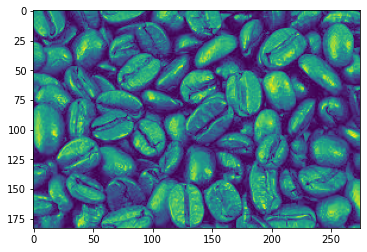

In [ ]:
img.show_img()

In [ ]:
img.cal_integral()
print(img.integral)

[[    159     318     473 ...   26011   26024   26024]
 [    322     616     893 ...   53112   53205   53215]
 [    465     890    1295 ...   80109   80377   80511]
 ...
 [  16423   34111   53483 ... 4504512 4519628 4534304]
 [  16467   34205   53666 ... 4528815 4544056 4558856]
 [  16505   34292   53828 ... 4553308 4568676 4583603]]


In [ ]:
img.cal_mean_var([100,20],[150,60])

[[0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.590000e+02 3.180000e+02 ... 2.601100e+04 2.602400e+04
  2.602400e+04]
 [0.000000e+00 3.220000e+02 6.160000e+02 ... 5.311200e+04 5.320500e+04
  5.321500e+04]
 ...
 [0.000000e+00 1.642300e+04 3.411100e+04 ... 4.504512e+06 4.519628e+06
  4.534304e+06]
 [0.000000e+00 1.646700e+04 3.420500e+04 ... 4.528815e+06 4.544056e+06
  4.558856e+06]
 [0.000000e+00 1.650500e+04 3.429200e+04 ... 4.553308e+06 4.568676e+06
  4.583603e+06]]
[[0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.930000e+02 3.860000e+02 ... 2.775300e+04 2.792200e+04
  2.792200e+04]
 [0.000000e+00 3.940000e+02 6.360000e+02 ... 5.305400e+04 5.322300e+04
  5.332300e+04]
 ...
 [0.000000e+00 1.964500e+04 3.764900e+04 ... 5.079770e+06 5.099024e+06
  5.118954e+06]
 [0.000000e+00 1.978900e+04 3.798900e+04 ... 5.108375e+06 5.127638e+06
  5.147584e+06]
 [0.000000e+00 1.995300e+04 3.82

(89.36489717838354, -7884.1211939488785)

In [19]:
arr =[[5,2,5,2],
      [3,6,3,6],
      [5,2,5,2],
      [3,6,3,6]]

arr = np.array(arr)
img = Integral_Image(img_arr=arr)

In [20]:
img.cal_integral()
print(img.integral)

[[ 5  7 12 14]
 [ 8 16 24 32]
 [13 23 36 46]
 [16 32 48 64]]


In [21]:
block_sum = img.cal_block_sum([0,0],[2,2])
print(block_sum)

36
5
13
12
16


In [8]:
img.cal_mean_var([1,1],[2,2])

[[ 0.  0.  0.  0.  0.]
 [ 0.  5.  7. 12. 14.]
 [ 0.  8. 16. 24. 32.]
 [ 0. 13. 23. 36. 46.]
 [ 0. 16. 32. 48. 64.]]
[[  0.   0.   0.   0.   0.]
 [  0.  25.  29.  54.  58.]
 [  0.  34.  74. 108. 148.]
 [  0.  59. 103. 162. 206.]
 [  0.  68. 148. 216. 296.]]


(4.0, 2.5)